
#2. Simulation of a two-dimensional random walk
=========

A random walk is a mathematical model that describes a path consisting of a succession of random
steps. In physics, random walks are fundamental in understanding diffusion processes, Brownian motion,
and other related phenomena. In this exercise, we will use Monte Carlo to simulate a two-dimensional
random walk.
    Consider a particle starting at the origin (0, 0) and that, at each time step, it moves one unit length
in a randomly chosen direction: up, down, left or right (i.e., along positive or negative x or y axes).
* Using a random number generator, choose the direction between the four possible (up, down, left, right), and move the particle at each time step. Compute and save $r^{\text{2}}= x^{\text{2}}_{\text{n}} + y^{\text{2}}_{\text{n}}$ at each time step n to keep track of the particle’s position.
* Perform the above simulation for 1000 time steps, repeating this process M = 1000 times to gather statistical data on the particle’s displacement. Average $r^{\text{2}}$ over all M simulations to get ⟨$r^{\text{2}}$⟩ as a function of n.
* Plot ⟨$r^{\text{2}}$⟩ versus n, and fit the data to a linear model ⟨$r^{\text{2}}$⟩ = 4Dn to find D.
* The expected value of D in this case is D = 0.25. Discuss the variability of paths taken during different simulations and how increasing M improves the accuracy of ⟨$r^{\text{2}}$⟩       


In [1]:
## Imports
import numpy as np 
import matplotlib.pyplot as plt
import random as rnd
from enum import Enum
from matplotlib.collections import LineCollection

def show_plot(title, xlabel, ylabel): 
    """
    Define plotting config
    title: str - plot title
    xlabel: str - x axis label
    ylabel: str - y axis label
    """
    plt.title(title) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()  

In [2]:
# Parameters and calculations
class Direction(Enum): 
    """
    Define rng correspondence to direction
    """
    UP = 1
    DOWN = 2
    LEFT = 3
    RIGHT = 4

def dir_to_coordinate(dir):
    """
    Convert direction to coordinate change
    dir: Direction - direction enum
    return: np.array - coordinate change
    """
    match(dir):
        case Direction.UP:
            coordinate_change = [0, 1]
        case Direction.DOWN:
            coordinate_change = [0, -1]
        case Direction.LEFT:
            coordinate_change = [-1, 0]
        case Direction.RIGHT:
            coordinate_change = [1, 0]
    return np.array(coordinate_change)
    

Path example
====

I will start off with displaying an example of a path. In the plot you will see how it moves from the starting point to the final point, with colors shifting from purple to red as more and more steps are taken.

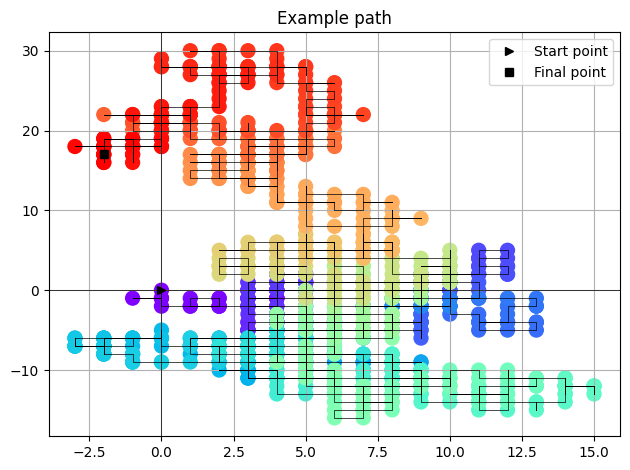

In [ ]:
def squared_displacement(x, y):
    return x**2 + y**2

def random_walk(step_cnt):
    """
    Simulate a random walk
    step_cnt: int - number of steps in the walk
    return: tuple - (squared displacements list, positions list)
    """
    positions = [np.zeros(2)] #rows are steps, columns are x and y coordinates, starting at origin
    displacement = [0]
    for _ in range(1, step_cnt):
        dir = Direction(rnd.randint(1, 4))
        coordinate_change = dir_to_coordinate(dir)
        current_element = positions[-1] + coordinate_change #get new position based on previous position
        positions.append(current_element)
        displacement.append(squared_displacement(current_element[0], current_element[1])) #calculate displacement from origin
    return displacement, positions

def show_path(step_cnt=1000):
    """
    Show an example path of a random walk
    step_cnt: int - number of steps in the walk
    """
    pos_x, pos_y = zip(*random_walk(step_cnt)[1])
    plt.plot(pos_x, pos_y, color="black", lw=0.5) #creates a line plot of the path
    plt.scatter(pos_x, pos_y, c=np.linspace(0, 1, step_cnt), cmap="rainbow", s=100) #creates a scatter plot of the path, shifts towards red as more steps are taken
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)
    plt.plot(0, 0, '>', color="black", label="Start point")
    plt.plot(pos_x[-1], pos_y[-1], 's', color="black", label="Final point")
    show_plot("Example path", "","")

def check_displacement(step_cnt, no_of_sims):
    """
    Check MSD and plot linear fit
    step_cnt: int - number of steps in each simulation
    no_of_sims: int - number of simulations to run
    return: np.array - coefficients of the linear fit [slope, constant]
    """
    steps = np.array(range(step_cnt)) #array of step counts
    displacements = np.zeros(step_cnt) #initialize displacements array
    for _ in range(no_of_sims):
        displacements += np.array(random_walk(step_cnt)[0]) #sum up displacements, for each step
    displacements /= no_of_sims #get the average displacements
    coeffs = np.polyfit(steps, displacements, 1) #linear fit to get D
    plt.plot(steps, displacements, label="Displacement")
    plt.plot(steps, np.polyval(coeffs, steps), label="Linear fit", linestyle='dashed')
    show_plot(f"Linear fitting the Monte Carlo results after {no_of_sims} simulation(s)", "Steps","Displacement")
    return coeffs

# Show example path
show_path()

Calculating the displacement
====

Now, I will calculate the mean squared displacement (MSD) as a function of the number of steps taken. For this, the average of the results of multiple Monte Carlo simulations of paths will be taken. This will compare when the number of Monte Carlo simulations is varied in order of magnitude, starting from 1 and going up to 10 000. The results will all be plotted and compared to theoretical values.

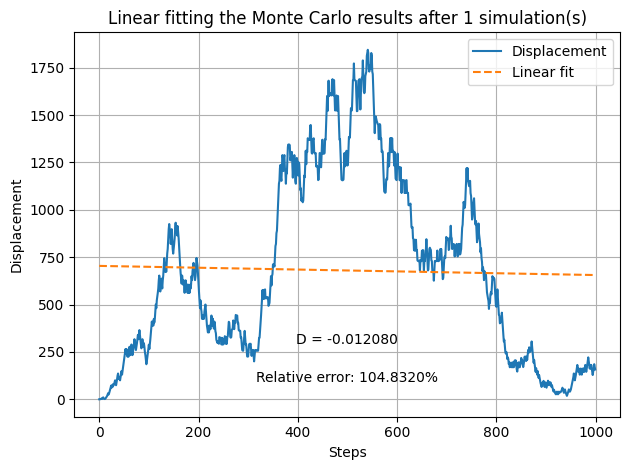

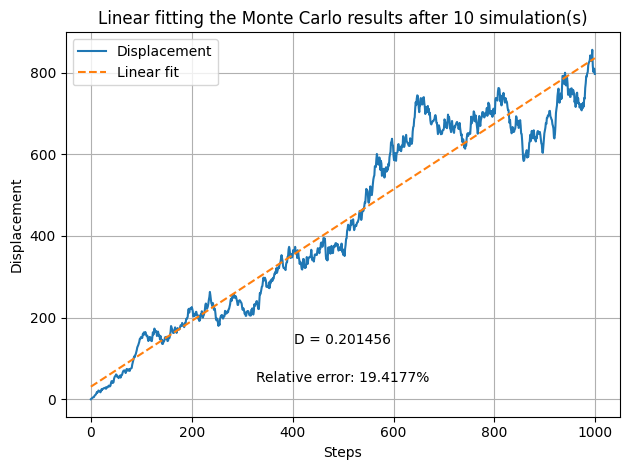

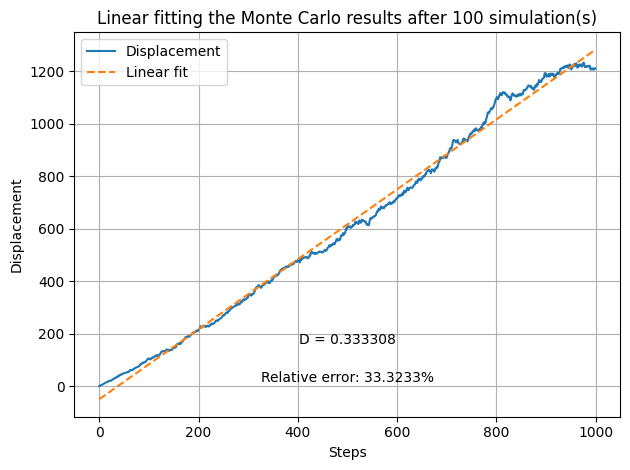

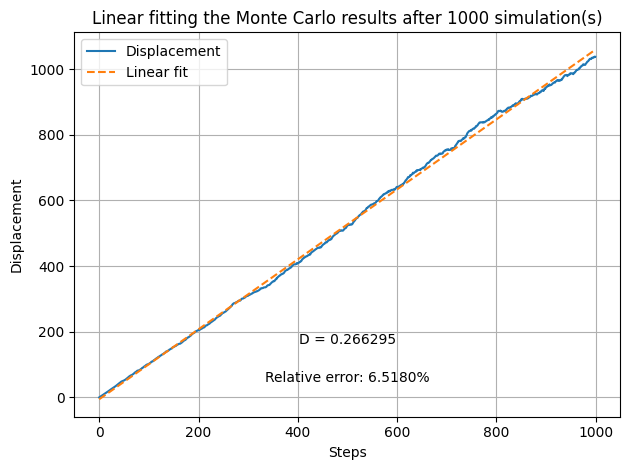

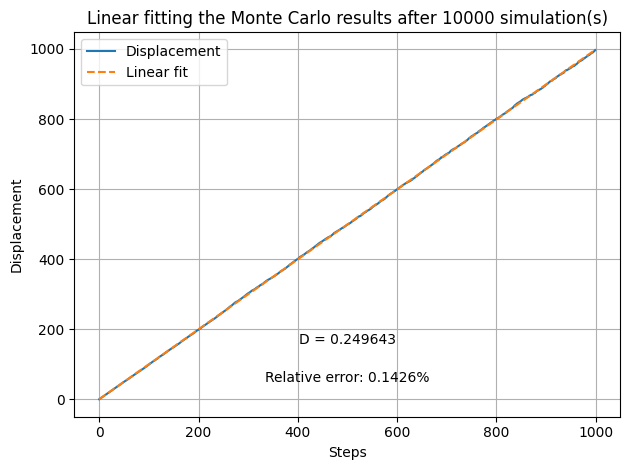

In [4]:
def calc_D(no_of_sims):
    """
    Calculate D and relative error, adds results to the plot
    no_of_sims: int - number of simulations to run"""
    step_cnt = 1000 # number of steps in each simulation
    expected = 0.25 # expected constant D
    coeffs = check_displacement(step_cnt, no_of_sims) 
    D = coeffs[0] / 4 #since 4*D is the slope of <r^2> = 4*D*n
    rel_error = abs((D - expected) / expected) * 100
    plt.text(0.5, 0.1, f"Relative error: {rel_error:.4f}%", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.text(0.5, 0.2, f"D = {(coeffs[0]/4):4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

for i in range(5): #Check accuracy with increasing number of simulations, from 1 to 10 000
    plt.figure(i)
    calc_D(10**(i))


Discussion
====

Individual random walks are highly variable, with each particle following an unpredictable path. However, when averaging over many simulations, the random fluctuations cancel out and a linear relationship between the MSD ⟨$r^{\text{2}}$⟩ and the number of steps n becomes apparent. It can then be expected that as we increase the number of simulations, the plotted values will take a more linear shape and from finding a linear fit we can estimate a value of D.

In the plots above the relative error of the estimated D compared to the expected value is shown. Sometimes the linear fit "is lucky" for lower number of simulations, giving a value of D more accurate to the expected $D = 0.25$ than higher simulations, but from the plots it should be visible that for higher number of simulations the plot values adhere better to a linear shape and variance is reduced. 